
### Supervised Learning
### Activity: Building a Student Intervention System

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail or pass. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: **  We have to predict whether the students are pass or fail. This is a classification model. 

### Question-2
load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read student data
df_std=pd.read_csv("student-data.csv")

**displaying first 5 rows**

In [3]:
df_std.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,yes


### Question-3
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [4]:
# Calculate number of students
n_students=df_std.shape[0]

In [5]:
# Calculate number of features
n_features=df_std.shape[1]

In [6]:
# Calculate passing students
n_pass=df_std.passed.value_counts()
n_passed=n_pass['yes']

In [10]:
# Calculate failing students
n_failed=n_pass['no']

In [8]:
# Calculate graduation rate
rate=df_std.passed.value_counts(normalize=True)*100
grad_rate=rate['yes']

In [11]:
# Print the results
print("Total Number of Students        :",n_students)
print("Total Number of Features        :",n_features)
print("Total Number of Passed students :",n_passed)
print("Total Number of Failed Students :",n_failed)
print("Graduation rate                 :",grad_rate)

Total Number of Students        : 395
Total Number of Features        : 31
Total Number of Passed students : 265
Total Number of Failed Students : 130
Graduation rate                 : 67.08860759493672


## Preparing the Data
you will prepare the data for modeling, training and testing.

### Question-4 Identify feature and target columns


separate the student data into feature and target columns to see if any features are non-numeric.

In [ ]:
# Extract feature columns

In [12]:
features=list(df_std.columns[:-1])
features


['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences']

In [ ]:
# Extract target column 'passed'

In [13]:
target=df_std.columns[-1]
target

'passed'

In [14]:
# Separate the data into feature data and target data (X and y, respectively)

In [15]:
x=df_std.drop("passed",axis=1)
y=df_std["passed"]

### Question-5 Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [16]:
x=pd.get_dummies(x,drop_first=True)
x

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,5,4,11,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,1,0,0
391,17,3,1,2,1,0,2,4,5,3,4,2,3,1,1,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0
392,21,1,1,1,1,3,5,5,3,3,3,3,3,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
393,18,3,2,3,1,0,4,4,1,3,4,5,0,1,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0


### Question - 6 Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. you will need to implement the following:
- Randomly shuffle and split the data (`X`, `y`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [17]:
# splitting the data into train and test

from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [18]:
# Show the results of the split

print("x_train :",x_train.shape)
print("x_test  :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test  :",y_test.shape)

x_train : (296, 39)
x_test  : (99, 39)
y_train : (296,)
y_test  : (99,)


### Question - 7  Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data and measure the accuracy score.

###  Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*

**1.LogisticRegression**
**2.SVM**
**3.Random forest.**

In [ ]:
#explaination


In [24]:
# Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# fit model-1  on traning data 

**Logical Regression**

In [25]:
logic_model=LogisticRegression()
logic_model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
# predict on the test data 

In [26]:
y_prediction = logic_model.predict(x_test)

In [ ]:
# calculate the accuracy score

In [28]:
accuracy_score(y_test,y_prediction)

0.696969696969697

In [ ]:
# fit the model-2 on traning data and predict on the test data and measure the accuracy

In [29]:
linear=SVC(kernel='linear')
linear.fit(x_train,y_train)
y_predict=linear.predict(x_test)
accuracy_score(y_test,y_predict)

0.6868686868686869

In [32]:
svm_poly=SVC(kernel='poly',degree=12)
svm_poly.fit(x_train,y_train)
y_pre=svm_poly.predict(x_test)
accuracy_score(y_test,y_pre)

0.6666666666666666

In [ ]:
# fit the model-3 on traning data and predict on the test data and measure the accuracy

In [33]:
rand_for=RandomForestClassifier()
rand_for.fit(x_train,y_train)
y_predic=rand_for.predict(x_test)
accuracy_score(y_test,y_predic)


0.6767676767676768

In [35]:
raft = RandomForestClassifier(n_estimators = 100, max_depth=15, random_state=42, criterion = "entropy")
raft.fit(x_train, y_train)
y_prdt = raft.predict(x_test)
accuracy_score(y_test,y_prdt)

0.6666666666666666

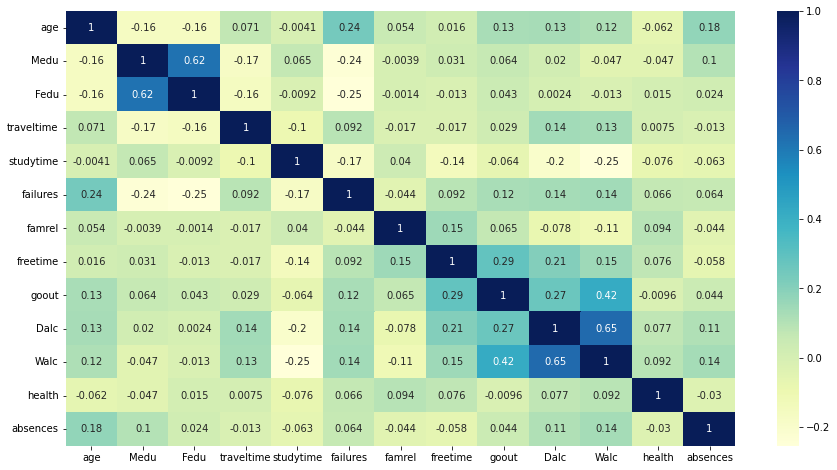

In [38]:
corrmatrix = df_std.corr()
plt.subplots(figsize=(15,8))
sn.heatmap(corrmatrix , annot =True , cmap ="YlGnBu")